In [1]:
import sympy as sp

## Pair potential and their gradients

In [26]:
u, v = sp.symbols('u, v')

In [27]:
E = 1/sp.sqrt( u**2 + v**2 )**2

In [28]:
sp.diff(E, u)

-2*u/(u**2 + v**2)**2

## Three body pot and the mess

In [62]:
xi = sp.symbols('x:6')
xi

(x0, x1, x2, x3, x4, x5)

In [64]:
u, v = [(xi[2*(k+1)] - xi[2*k], xi[2*(k+1) + 1] - xi[2*k + 1]) for k in range(2)]
u, v

((-x0 + x2, -x1 + x3), (-x2 + x4, -x3 + x5))

In [66]:
d12 = sp.sqrt(u[0]**2 + u[1]**2)
d23 = sp.sqrt(v[0]**2 + v[1]**2)

cosinus = (u[0]*v[0] + u[1]*v[1])/(d12*d23)
cosinus

((-x0 + x2)*(-x2 + x4) + (-x1 + x3)*(-x3 + x5))/(sqrt((-x0 + x2)**2 + (-x1 + x3)**2)*sqrt((-x2 + x4)**2 + (-x3 + x5)**2))

In [67]:
E = (cosinus - 1)**2
grad = [sp.diff(E, x) for x in xi]

In [119]:
sub_exprs, simplified_rhs = sp.cse(grad,
                                   sp.numbered_symbols('u'))

for symb, exp in sub_exprs:
    print( sp.julia_code(exp, symb).replace('.', '') )

print('===')
print(', \n'.join(sp.julia_code(eq).replace('.', '') for eq in simplified_rhs))

u0 = -x0 + x2
u1 = -x2
u2 = u1 + x4
u3 = -x1 + x3
u4 = -x3
u5 = u4 + x5
u6 = u0*u2 + u3*u5
u7 = u0^2 + u3^2
u8 = 1/sqrt(u7)
u9 = u2^2 + u5^2
u10 = 1/sqrt(u9)
u11 = u10*u8
u12 = u11*u6 - 1
u13 = x2 - x4
u14 = 2*u11
u15 = 2*u6
u16 = u10*u15/u7^(3/2)
u17 = x3 - x5
u18 = u15*u8/u9^(3/2)
===
u12*(u0*u16 + u13*u14), 
u12*(u14*u17 + u16*u3), 
u12*(u14*(x0 - 2*x2 + x4) + u16*(u1 + x0) + u18*u2), 
u12*(u14*(x1 - 2*x3 + x5) + u16*(u4 + x1) + u18*u5), 
u12*(u0*u14 + u13*u18), 
u12*(u14*u3 + u17*u18)


In [120]:
sub_exprs, simplified_rhs = sp.cse(E,
                                   sp.numbered_symbols('u'))

for symb, exp in sub_exprs:
    print( sp.julia_code(exp, symb).replace('.', '') )

print('===')
print(', \n'.join(sp.julia_code(eq).replace('.', '') for eq in simplified_rhs))

u0 = -x0 + x2
u1 = -x1 + x3
u2 = -x2 + x4
u3 = -x3 + x5
===
(-1 + (u0*u2 + u1*u3)/(sqrt(u0^2 + u1^2)*sqrt(u2^2 + u3^2)))^2


## notes

Automatic Code Generation with SymPy  
https://www.sympy.org/scipy-2017-codegen-tutorial/

Common Subexpression Elimination  
https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/07-the-hard-way.html#Common-Subexpression-Elimination

# Graphs

In [46]:
import numpy as np
import matplotlib.pylab as plt

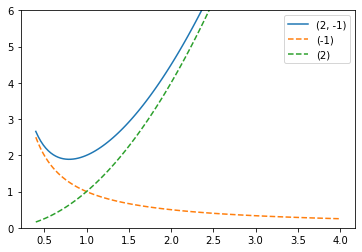

In [91]:
x = np.linspace(.4, 4, 123)
y_elec = x**2  + 1/x 
plt.plot(x, y_elec, label="(2, -1)"),
plt.plot(x, 1/x, '--', label="(-1)"),
plt.plot(x, x**2, '--', label="(2)"),
plt.legend();
plt.ylim([0, 6]);

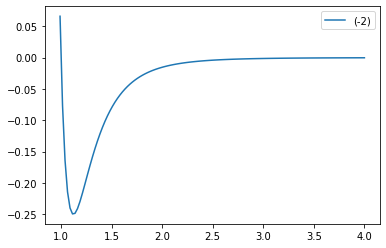

In [94]:
#plt.plot(x, y_LJ, label="(-12, -6)"),

x = np.linspace(.99, 4, 123)
y_LJ = 1/x**12 - 1/x**6
plt.plot(x, y_LJ, label="(-2)"),
plt.legend();

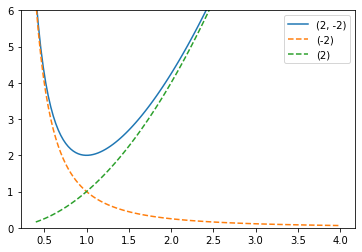

In [103]:
x = np.linspace(.4, 4, 123)
k = 1
y_elec = k*x**2  + 1/x**2
plt.plot(x, y_elec, label="(2, -2)"),
plt.plot(x, 1/x**2, '--', label="(-2)"),
plt.plot(x, k*x**2, '--', label="(2)"),
plt.legend();
plt.ylim([0, 6]);

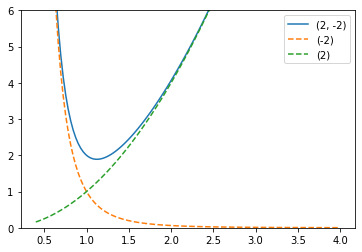

In [106]:
x = np.linspace(.4, 4, 123)
k = 1
y_elec = k*x**2  + 1/x**4
plt.plot(x, y_elec, label="(2, -2)"),
plt.plot(x, 1/x**4, '--', label="(-2)"),
plt.plot(x, k*x**2, '--', label="(2)"),
plt.legend();
plt.ylim([0, 6]);